# Python et H2O

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
import h2o

Le module [h2o](http://docs.h2o.ai/h2o/latest-stable/index.html) n'est pas implémentée en python mais en java. Python communique avec la librairie via un serveur démarré avec l'instruction [init](http://h2o-release.s3.amazonaws.com/h2o/rel-turchin/9/docs-website/h2o-py/docs/h2o.html?highlight=init#h2o.h2o.init). Le langage Python sert juste à s'interfacer avec ce serveur. Les données doivent être transmises au serveur avant de pouvoir être traitées.

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,21 secs
H2O cluster version:,3.10.0.7
H2O cluster version age:,"21 days, 21 hours and 59 minutes"
H2O cluster name:,H2O_from_python_xadupre_snteqo
H2O cluster total nodes:,1
H2O cluster free memory:,1.750 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [ ]:
from sklearn import linear_model, datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
import pandas, numpy
df = pandas.DataFrame(numpy.hstack([X.reshape((len(Y),2)),Y.reshape((len(Y), 1))]), columns=["X1", "X2", "Y"])
df.to_csv("iris.csv", index=False)
df.head(n=2)

,X1,X2,Y
0,5.1,3.5,0.0
1,4.9,3.0,0.0


In [ ]:
iris = h2o.import_file(path="iris.csv")
iris.describe()

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
Rows:150
Cols:3




,X1,X2,Y
type,real,real,int
mins,4.3,2.0,0.0
mean,5.843333333333334,3.0539999999999994,0.9999999999999998
maxs,7.9,4.4,2.0
sigma,0.8280661279778637,0.4335943113621737,0.8192319205190406
zeros,0,0,50
missing,0,0,0
0,5.1000000000000005,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0


In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rf = H2ORandomForestEstimator()
rf.train(x=["X1", "X2"], y="Y", training_frame=iris)

drf Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


In [ ]:
rf.type

'classifier'

Petit problème ici : le type est classifier, la métrique laisse penser que c'est une régression.

In [ ]:
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1476214111709_8
Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,20321.0,8.0,14.0,10.38,19.0,34.0,27.28




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.19579157519395962
RMSE: 0.44248341798756663
MAE: 0.32339193230634367
RMSLE: 0.19400647970040713
Mean Residual Deviance: 0.19579157519395962
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2016-10-11 22:12:02,0.016 sec,0.0,nan,nan,nan
,2016-10-11 22:12:02,0.032 sec,1.0,0.7527273,0.5040984,0.5665984
,2016-10-11 22:12:02,0.032 sec,2.0,0.6766826,0.4533514,0.4578993
,2016-10-11 22:12:02,0.047 sec,3.0,0.6345770,0.4159483,0.4026880
,2016-10-11 22:12:02,0.047 sec,4.0,0.6157649,0.4199778,0.3791664
---,---,---,---,---,---,---
,2016-10-11 22:12:02,0.268 sec,46.0,0.4461789,0.3265072,0.1990756
,2016-10-11 22:12:02,0.273 sec,47.0,0.4443849,0.3249500,0.1974780
,2016-10-11 22:12:02,0.277 sec,48.0,0.4431635,0.3239759,0.1963939
,2016-10-11 22:12:02,0.281 sec,49.0,0.4432085,0.3239742,0.1964338



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
X1,2568.9436035,1.0,0.7161693
X2,1018.1182251,0.3963179,0.2838307


In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))
data = numpy.c_[xx.ravel(), yy.ravel()]

from h2o.frame import H2OFrame
datah2o = H2OFrame(data.tolist())
datah2o.set_names(["X1", "X2"])
datah2o

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


X1,X2
3.8,1.5
3.82,1.5
3.84,1.5
3.86,1.5
3.88,1.5
3.9,1.5
3.92,1.5
3.94,1.5
3.96,1.5
3.98,1.5


In [ ]:
hZ = rf.predict(datah2o)
hZ

drf prediction progress: |████████████████████████████████████████████████████████████████████| 100%


predict
0.54
0.54
0.54
0.54
0.54
0.54
0.54
0.54
0.54
0.54


In [ ]:
pZ = hZ.as_data_frame()
type(pZ)

pandas.core.frame.DataFrame

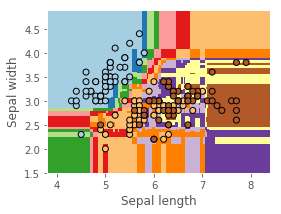

In [ ]:
Z = pZ.as_matrix().reshape(xx.shape)

import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, lw=1, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

L'instruction [shutdown](http://h2o-release.s3.amazonaws.com/h2o/rel-turchin/9/docs-website/h2o-py/docs/h2o.html?highlight=shutdown#h2o.h2o.shutdown) clôt le serveur *h2o*.

In [ ]:
h2o.shutdown(prompt=False)

H2O session _sid_a5eb closed.
